### Analyze results obtained from DMRG simulations
##### A sample code for the XXZ model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
import h5py

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/koichiro/Documents/GitHub/Julia_tutorial


In [4]:
### Used to resize figures later
goldenRatio = (5**0.5 - 1) / 2

In [5]:
'''
    Extrapolate data from HDF5 files
'''

def data_extrapolation(file_name, label):
    tmp_file = h5py.File(file_name, "r")
    if label not in tmp_file.keys():
        print("Error: key doesn't exist!")
    else:
        tmp_Sz = np.array(tmp_file[label]).transpose()
        
    return tmp_Sz

In [6]:
'''
    Extrapolate data from HDF5 files
'''

def data_extrapolation(file_name, label):
    tmp_Sz = None  # Initialize the variable
    with h5py.File(file_name, "r") as tmp_file:
        if label not in tmp_file.keys():
            print(f"Error: key '{label}' doesn't exist in the file '{file_name}'!")
        else:
            tmp_Sz = np.array(tmp_file[label]).transpose()
    return tmp_Sz

SvN_Delta0p5 = data_extrapolation("Data/XXZ_Delta1.5_N100_x.h5", "SvN")


Error: key 'SvN' doesn't exist in the file 'Data/XXZ_Delta1.5_N100_x.h5'!


In [7]:
def list_keys(file_name):
    with h5py.File(file_name, "r") as tmp_file:
        print(f"Keys in file '{file_name}': {list(tmp_file.keys())}")
list_keys("Data/XXZ_Delta1.5_N100_x.h5")

Keys in file 'Data/XXZ_Delta1.5_N100_x.h5': ['Cxx', 'E0', 'Psi', 'Sx']


#### Analyze equal-time spin correlation function in the XXZ model
###### Note: Depending on where the output files are on your laptop, you might need to change the file path below

In [8]:
Czz_Delta0p5 = data_extrapolation("Data/XXZ_Delta1.5_N100_x.h5", "Cxx")

In [9]:
SvN_Delta0p5 = data_extrapolation("Data/XXZ_Delta1.5_N100_x.h5", "Sx")

In [10]:
Czz_Delta1p5 = data_extrapolation("Data/XXZ_Delta1.5_N100_x.h5", "Cxx")

In [11]:
SvN_Delta1p5 = data_extrapolation("Data/XXZ_Delta1.5_N100_x.h5", "Sx")

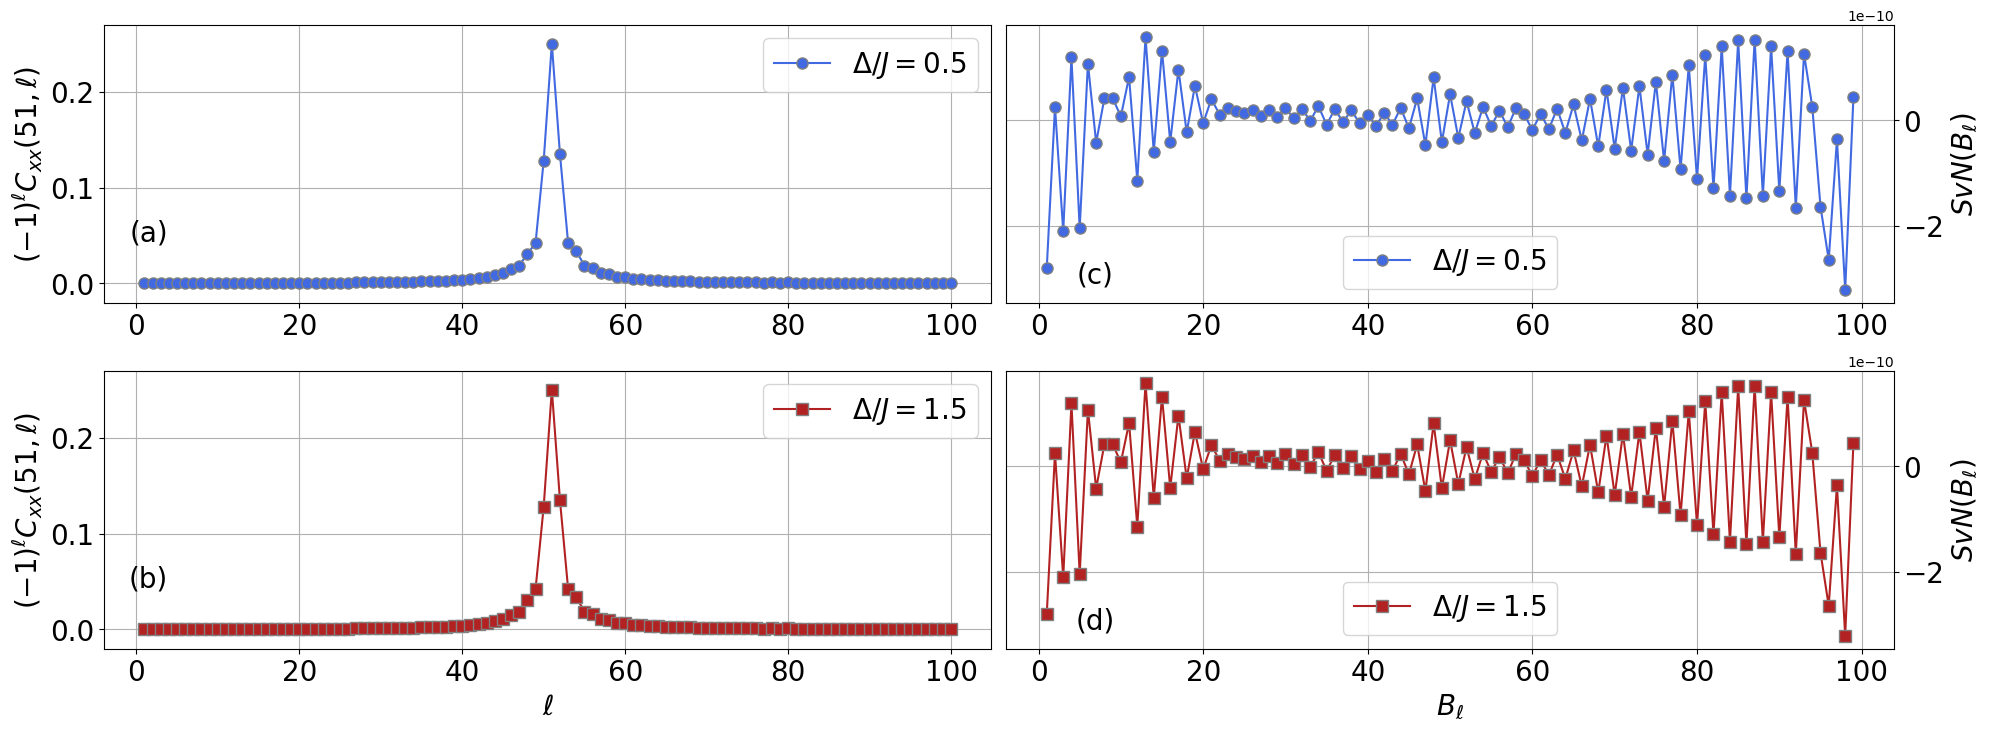

In [12]:
'''
    Visualize the spin correlation function
'''

fig = plt.figure(figsize = (20, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)

ax = fig.add_subplot(spec[0, 0])
Staggered_Czz = Czz_Delta0p5[50, :].real
for index, _ in enumerate(Staggered_Czz):
    Staggered_Czz[index] *= (-1)**index

ax.plot(np.arange(1, 101), Staggered_Czz, color = "royalblue", \
        marker = 'o', markersize = 8, markeredgecolor = "gray", label = r"$\Delta/J = 0.5$")

ax.text(0.05, 0.25, "(a)", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 20)
ax.set_ylim(-0.02, 0.27)
ax.set_ylabel(r'$(-1)^{\ell}C_{xx}(51, \ell)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

ax = fig.add_subplot(spec[1, 0])
Staggered_Czz = Czz_Delta1p5[50, :].real
for index, _ in enumerate(Staggered_Czz):
    Staggered_Czz[index] *= (-1)**index

ax.plot(np.arange(1, 101), Staggered_Czz, color = "firebrick", \
        marker = 's', markersize = 8, markeredgecolor = "gray", label = r"$\Delta/J = 1.5$")

ax.text(0.05, 0.25, "(b)", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 20)
ax.set_ylim(-0.02, 0.27)
ax.set_xlabel(r'$\ell$', fontsize = 20)
ax.set_ylabel(r'$(-1)^{\ell}C_{xx}(51, \ell)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  


ax = fig.add_subplot(spec[0, 1])
ax.plot(np.arange(1, 100), SvN_Delta0p5[0 : -1], color = "royalblue", \
        marker = 'o', markersize = 8, markeredgecolor = "gray", label = r"$\Delta/J = 0.5$")

ax.text(0.1, 0.1, "(c)", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 20)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel(r'$SvN(B_{\ell})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

ax = fig.add_subplot(spec[1, 1])
ax.plot(np.arange(1, 100), SvN_Delta1p5[0 : -1], color = "firebrick", \
        marker = 's', markersize = 8, markeredgecolor = "gray", label = r"$\Delta/J = 1.5$")

ax.text(0.1, 0.1, "(d)", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 20)
ax.yaxis.set_label_position("right")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xlabel(r'$B_{\ell}$', fontsize = 20)
ax.set_ylabel(r'$SvN(B_{\ell})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig("Figures/XXZ_Model_Spin_Correlation_Cxx.pdf")